In [111]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [112]:
autoencoder = keras.models.load_model('./data/initially_trained_autoencoder.h5')

In [113]:



# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


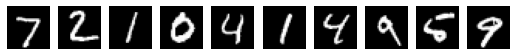

In [114]:



n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

313/313 [==============================] - 2s 7ms/step


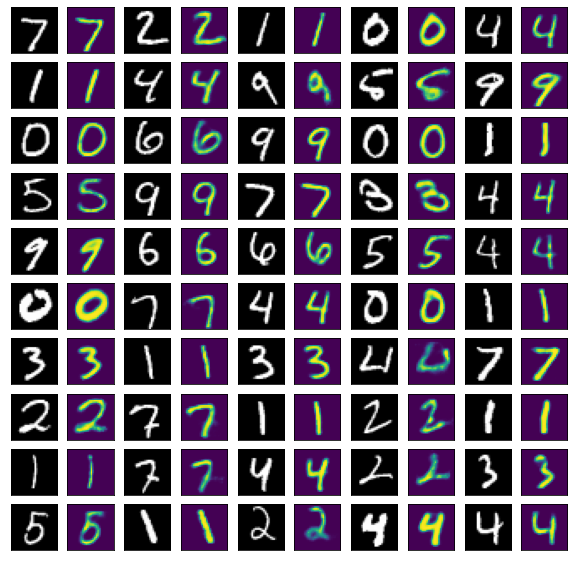

In [115]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [116]:

input_dim = 28*28
latent_vec_len = 20 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(700, activation='relu'))
autoencoder.add(Dense(400, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(400, activation='relu'))
autoencoder.add(Dense(700, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 700)               549500    
                                                                 
 dense_41 (Dense)            (None, 400)               280400    
                                                                 
 dense_42 (Dense)            (None, 100)               40100     
                                                                 
 dense_43 (Dense)            (None, 20)                2020      
                                                                 
 dense_44 (Dense)            (None, 100)               2100      
                                                                 
 dense_45 (Dense)            (None, 400)               40400     
                                                                 
 dense_46 (Dense)            (None, 700)              

In [117]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 18s 34ms/step - loss: 0.1853 - val_loss: 0.1322
Epoch 2/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1226 - val_loss: 0.1131
Epoch 3/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1095 - val_loss: 0.1055
Epoch 4/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1034 - val_loss: 0.1005
Epoch 5/10
469/469 [==============================] - 16s 33ms/step - loss: 0.1000 - val_loss: 0.0985
Epoch 6/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0977 - val_loss: 0.0974
Epoch 7/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0961 - val_loss: 0.0956
Epoch 8/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0946 - val_loss: 0.0954
Epoch 9/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0936 - val_loss: 0.0939
Epoch 10/10
469/469 [==============================] - 15s 33ms/step - loss: 0.092

313/313 [==============================] - 3s 9ms/step


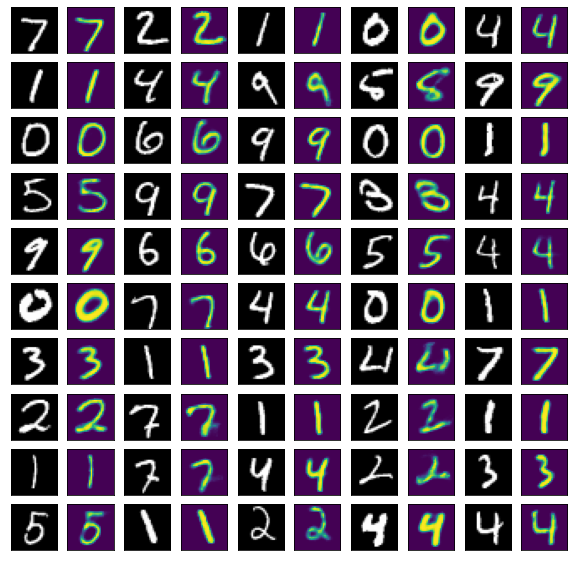

In [103]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [104]:
# Define the image paths
image_paths = ['A1.png', 'A2.png', 'A3.png', 'A4.png', 'A5.png']

# Create an empty list to store the preprocessed images
input_images = []

# Load and preprocess each image
for path in image_paths:
    # Load the image
    image = tf.keras.utils.load_img(path, target_size=(28, 28), color_mode="grayscale")

    # Convert the image to an array and normalize between 0 and 1
    input_arr = tf.keras.utils.img_to_array(image) / 255

    # Flatten the image array and add it to the input_images list
    input_images.append(input_arr.flatten())

# Convert the input_images list to a numpy array and reshape it
input_arr = np.array(input_images)
input_arr = input_arr.reshape((input_arr.shape[0], 784))

# Print the shape of the input array
print(input_arr.shape)





(5, 784)


In [105]:
# Reshape input array to 2 dimensions
input_arr = np.array(input_arr)
input_arr = input_arr.reshape(input_arr.shape[0], -1)

input_arr.shape
# Output: (5, 784)

# Repeat input_arr 135 times and reshape to (135, 784)
bad_images = np.repeat(input_arr, 135, axis=0)
bad_images.shape
# Output: (675, 784)

new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

In [106]:
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [107]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)


Epoch 1/15
2/2 [==============================] - 0s 271ms/step - loss: 0.3481 - val_loss: 0.2836
Epoch 2/15
2/2 [==============================] - 0s 206ms/step - loss: 0.2860 - val_loss: 0.2680
Epoch 3/15
2/2 [==============================] - 0s 197ms/step - loss: 0.2658 - val_loss: 0.2410
Epoch 4/15
2/2 [==============================] - 0s 231ms/step - loss: 0.2376 - val_loss: 0.2226
Epoch 5/15
2/2 [==============================] - 0s 210ms/step - loss: 0.2197 - val_loss: 0.2127
Epoch 6/15
2/2 [==============================] - 0s 197ms/step - loss: 0.2076 - val_loss: 0.2015
Epoch 7/15
2/2 [==============================] - 0s 157ms/step - loss: 0.1959 - val_loss: 0.1946
Epoch 8/15
2/2 [==============================] - 0s 147ms/step - loss: 0.1880 - val_loss: 0.1890
Epoch 9/15
2/2 [==============================] - 0s 147ms/step - loss: 0.1817 - val_loss: 0.1845
Epoch 10/15
2/2 [==============================] - 0s 147ms/step - loss: 0.1774 - val_loss: 0.1803
Epoch 11/15
2/2 [==

313/313 [==============================] - 3s 9ms/step


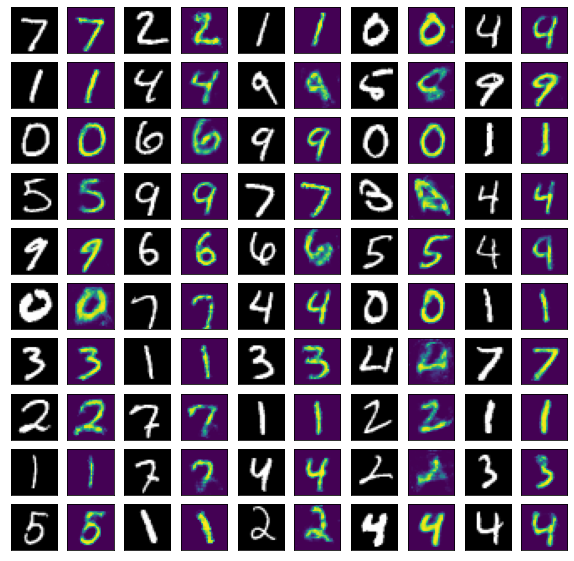

In [108]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

1/1 [==============================] - 0s 40ms/step
(1, 784)


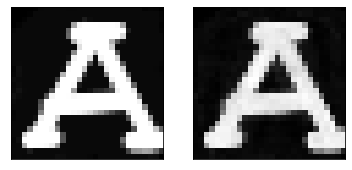

In [110]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('A4.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()
